In [2]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# purchasing data
data = pd.read_csv('Social_Network_Ads.csv', delimiter = ';')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE = LabelEncoder()
data['Gender'] = LE.fit_transform(data['Gender'])

In [11]:
# drop user id column 
data = data.drop('User ID', axis=1)

In [12]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [16]:
data.sum()

Gender                  196
Age                   15062
EstimatedSalary    27897000
Purchased               143
dtype: int64

In [17]:
143/400

0.3575

In [18]:
(400-143)/400

0.6425

In [ ]:
#the output is unbalance

# Balance the output by up Sampling

# Feature Scaling 

In [28]:
data_scale = data[['Age', 'EstimatedSalary']]

In [29]:
data_no_scale = data[['Gender', 'Purchased']]

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_scale = sc.fit_transform(data_scale)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
data_scale = pd.DataFrame(data_scale)

In [32]:
#concat scaled and not scaled again
data = pd.concat([data_scale, data_no_scale], axis=1)

In [33]:
data.head()

,0,1,Gender,Purchased
0,0.023810,0.029630,1,0
1,0.404762,0.037037,1,0
2,0.190476,0.207407,0,0
3,0.214286,0.311111,0,0
4,0.023810,0.451852,1,0


In [34]:
data.columns = ['Age', 'EstimatedSalary', 'Gender', 'Purchased']

In [35]:
data.head()

,Age,EstimatedSalary,Gender,Purchased
0,0.023810,0.029630,1,0
1,0.404762,0.037037,1,0
2,0.190476,0.207407,0,0
3,0.214286,0.311111,0,0
4,0.023810,0.451852,1,0


# Spliting the data

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Gender"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]

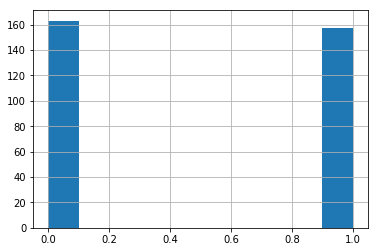

In [42]:
data_train['Gender'].hist()

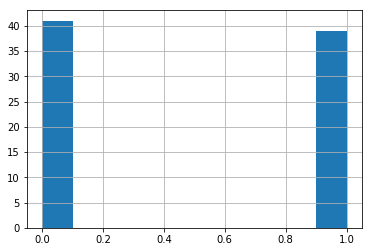

In [43]:
data_test['Gender'].hist()

# split should be before scaling 

In [45]:
X_train = data_train[['Age', 'EstimatedSalary', 'Gender']]
y_train = data_train['Purchased']
X_test = data_test[['Age', 'EstimatedSalary', 'Gender']]
y_test = data_test['Purchased']

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
y_predict = model.predict(X_train)

In [50]:
y_predict_test = model.predict(X_test)

In [53]:
accuracy_train = accuracy_score(y_predict, y_train)
accuracy_train

0.834375

In [54]:
accuracy_test = accuracy_score(y_predict_test, y_test)
accuracy_test

0.8375